# Classification homework #1

In this homework we will be dealing with Thyroid Disease Data Set with the main goal of


## Imports

Importing necessary packages, data set and its description

In [2]:
# Importing packages

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score,recall_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_multilabel_classification
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn_pandas import DataFrameMapper, gen_features
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier

plt.rcParams['figure.figsize'] = 10, 10
plt.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Importing the data

df = pd.read_csv('./dataset_57_hypothyroid.csv')

Description of the data can be found here:

http://archive.ics.uci.edu/ml/datasets/thyroid+disease

## EDA

In [5]:
# Checking the shape of the data:

df.shape

(3772, 30)

From the shape of the data we can see that we have 3772 rows and 3 variables. Let's call the `.info()` method on the DataFrame to check the number of non-null values and dtypes of the variables.

In [6]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [ ]:
# Getting info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

From the output we conclude the following: having all variables of object type means that our variables are not coded in the proper way. Reason for this most likely is that we have some string being a replacement for missing values which we can also conclude because we have the same number of non-null values as we have rows in the data (3772).

Let's check for unique values and value counts for each variable in the data set to see what strings are replacing our missing values.

In [ ]:
# First checking for unique values
for i in df.columns:
    print(f'Unique values for {i} are {df[i].unique()}')

Unique values for age are ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']
Unique values for sex are ['F' 'M' '?']
Unique values for on_thyroxine are ['f' 't']
Unique values for query_on_thyroxine are ['f' 't']
Unique values for on_antithyroid_medication are ['f' 't']
Unique values for sick are ['f' 't']
Unique values for pregnant are ['f' 't']
Unique values for thyroid_surgery are ['f' 't']
Unique values for I131_treatment are ['f' 't']
Unique values for query_hypothyroid are ['f' 't']
Unique values for query_hyperthyroid are ['f' 't']
Unique values for lithium are ['f' 

In [ ]:
# Getting the value counts for each variable
for i in df.columns:
    print(f'''The value counts for {i} are
{df[i].value_counts()}
''')

The value counts for age are 
59     95
60     91
70     90
73     81
55     81
       ..
4       1
5       1
455     1
6       1
?       1
Name: age, Length: 94, dtype: int64

The value counts for sex are 
F    2480
M    1142
?     150
Name: sex, dtype: int64

The value counts for on_thyroxine are 
f    3308
t     464
Name: on_thyroxine, dtype: int64

The value counts for query_on_thyroxine are 
f    3722
t      50
Name: query_on_thyroxine, dtype: int64

The value counts for on_antithyroid_medication are 
f    3729
t      43
Name: on_antithyroid_medication, dtype: int64

The value counts for sick are 
f    3625
t     147
Name: sick, dtype: int64

The value counts for pregnant are 
f    3719
t      53
Name: pregnant, dtype: int64

The value counts for thyroid_surgery are 
f    3719
t      53
Name: thyroid_surgery, dtype: int64

The value counts for I131_treatment are 
f    3713
t      59
Name: I131_treatment, dtype: int64

The value counts for query_hypothyroid are 
f    3538
t     234

From these two methods we can see that our missing values are in fact coded with a string that is `?`

Before anything let's change this value to `np.nan` so we can get a better insight into the data.

In [ ]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

After replacing `?` in our data set we can see some improvement over the inital state of the dataframe. In fact, one feature strikes with most impression, `TBG` having only np.nan values. This feature is in fact a constant and is of no interest to us, so it will be dropped. We must pay attention to a feature related to `TBG` called `TBG_measured` which is a boolean variable and states if the thyroxine-binding globulin (TBG) has been measured.

In [ ]:
# Dropping the TBG feature

df.drop('TBG', axis=1, inplace=True)

# Checking for unique values of TBG_measured

df['TBG_measured'].unique()

array(['f'], dtype=object)

We can see that `TBG_measured` has only one unique value which means it is also a constant so it should be dropped from the data set also. Let's check if any other feature is like these two.



In [ ]:
# Checking for columns with only one unique value

for col in df.columns:
  print(f'Number of unique values for {col} is: {df[col].nunique()}')


Number of unique values for age is: 93
Number of unique values for sex is: 2
Number of unique values for on_thyroxine is: 2
Number of unique values for query_on_thyroxine is: 2
Number of unique values for on_antithyroid_medication is: 2
Number of unique values for sick is: 2
Number of unique values for pregnant is: 2
Number of unique values for thyroid_surgery is: 2
Number of unique values for I131_treatment is: 2
Number of unique values for query_hypothyroid is: 2
Number of unique values for query_hyperthyroid is: 2
Number of unique values for lithium is: 2
Number of unique values for goitre is: 2
Number of unique values for tumor is: 2
Number of unique values for hypopituitary is: 2
Number of unique values for psych is: 2
Number of unique values for TSH_measured is: 2
Number of unique values for TSH is: 287
Number of unique values for T3_measured is: 2
Number of unique values for T3 is: 69
Number of unique values for TT4_measured is: 2
Number of unique values for TT4 is: 241
Number o

As we can see, the only feature left with only one unique value is `TBG_measured` so we will drop it from the DataFrame.

In [ ]:
# Dropping TBG_measured feature

df.drop('TBG_measured', axis=1, inplace=True)

Let's now create a series of countplots to actually see which data is categorical and which is numerical but coded the wrong way. This graphs will also give as an insight into the distribution of our features and our target.

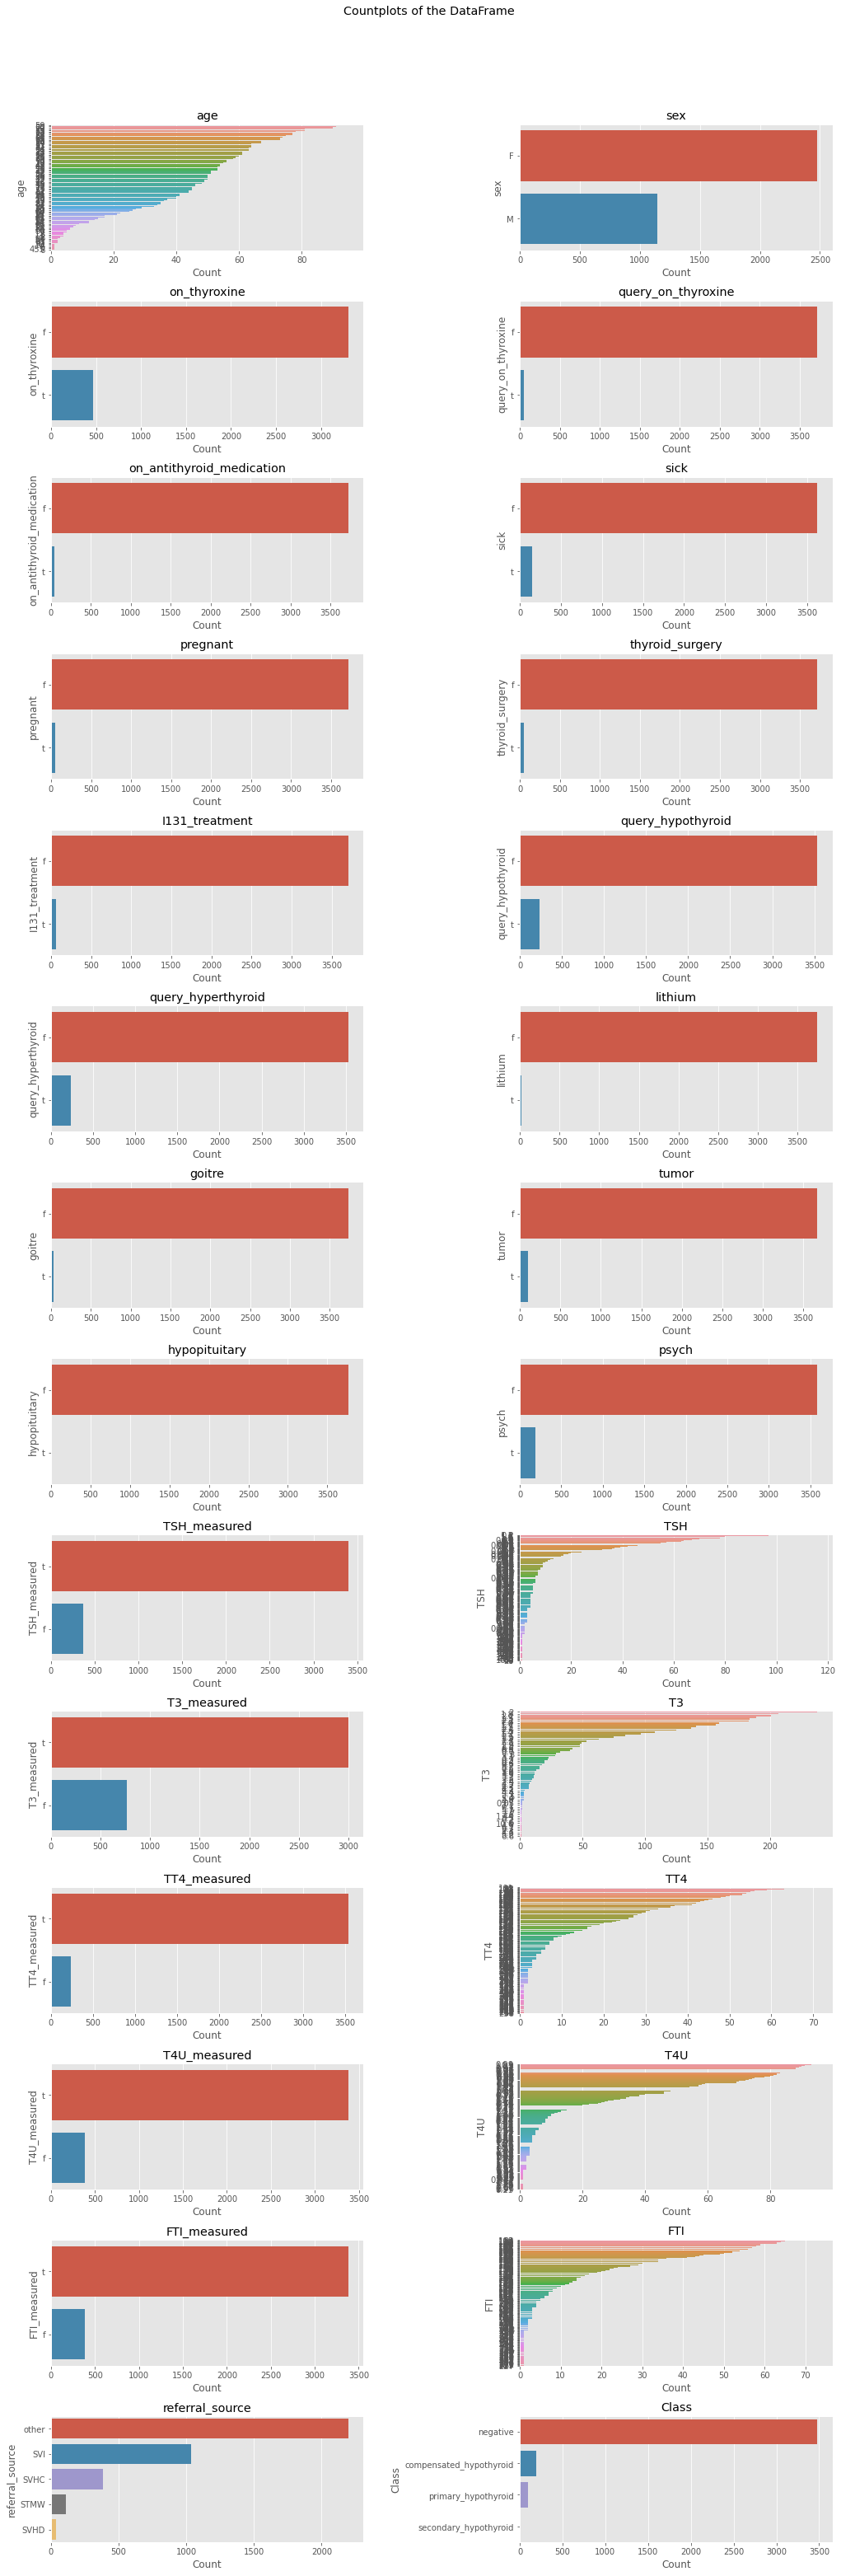

In [ ]:
# Displaying countplots for categorical variables
f, axes = plt.subplots(14,2,figsize=(17,50))
for f,ax in zip(df, axes.ravel()):
    sns.countplot(y=f, data=df, ax=ax, order=df[f].value_counts().index)
    ax.set_title(f)
    ax.set_ylabel(f)
    ax.set_xlabel('Count')
plt.suptitle('Countplots of the DataFrame', fontsize="x-large")
plt.subplots_adjust(top=0.94,
                    wspace=0.5,
                    hspace=0.4)
plt.show();

We can clearly see that `age`,`TSH`, `T3`, `TT4`, `T4U` a and `FTI` should be numerical instead of categorical, so we will recode them appropriately.

This sample has more females than males.

In this section we must note that our categotical features are very unevenly distributed with false values being predominant on variables that check some kind of condition (for example `thyroid_surgery`) and mostly true values for variables associated with numerical variables (for example `TSH_measured`).

In [ ]:
numerical_columns = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
for col in numerical_columns:
  df[col] = df[col].astype('float64')

df.dtypes

age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
referral_source               object
C

In [ ]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


Numerical variables are clearly on different scales so we will have to use some kind of scaling technique later on in the work.

Carefully observing the `age` data points we can see the max value being 455 which is highly unlikely. Let's plot a box and whisker plot to see this data.

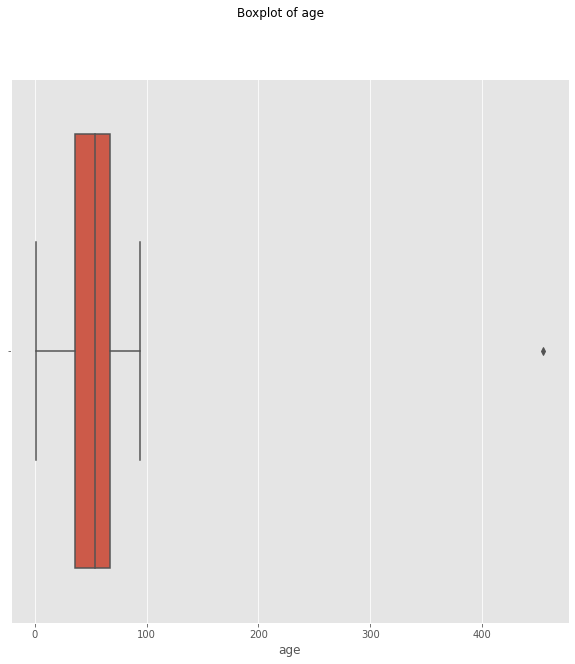

In [ ]:
# Plotting age

sns.boxplot(x='age',
            data=df)
plt.suptitle('Boxplot of age')
plt.show();

We can see only one outlier which is probably just a typo. Nevertheless, this value will be replaced with np.nan value and later on imputed.

In [ ]:
# Replacting max value of age

df['age'].replace(df['age'].max(), np.nan, inplace=True)

Let's create a boxplot of all our numerical data to see what's the case with them, also we will count their outliers.

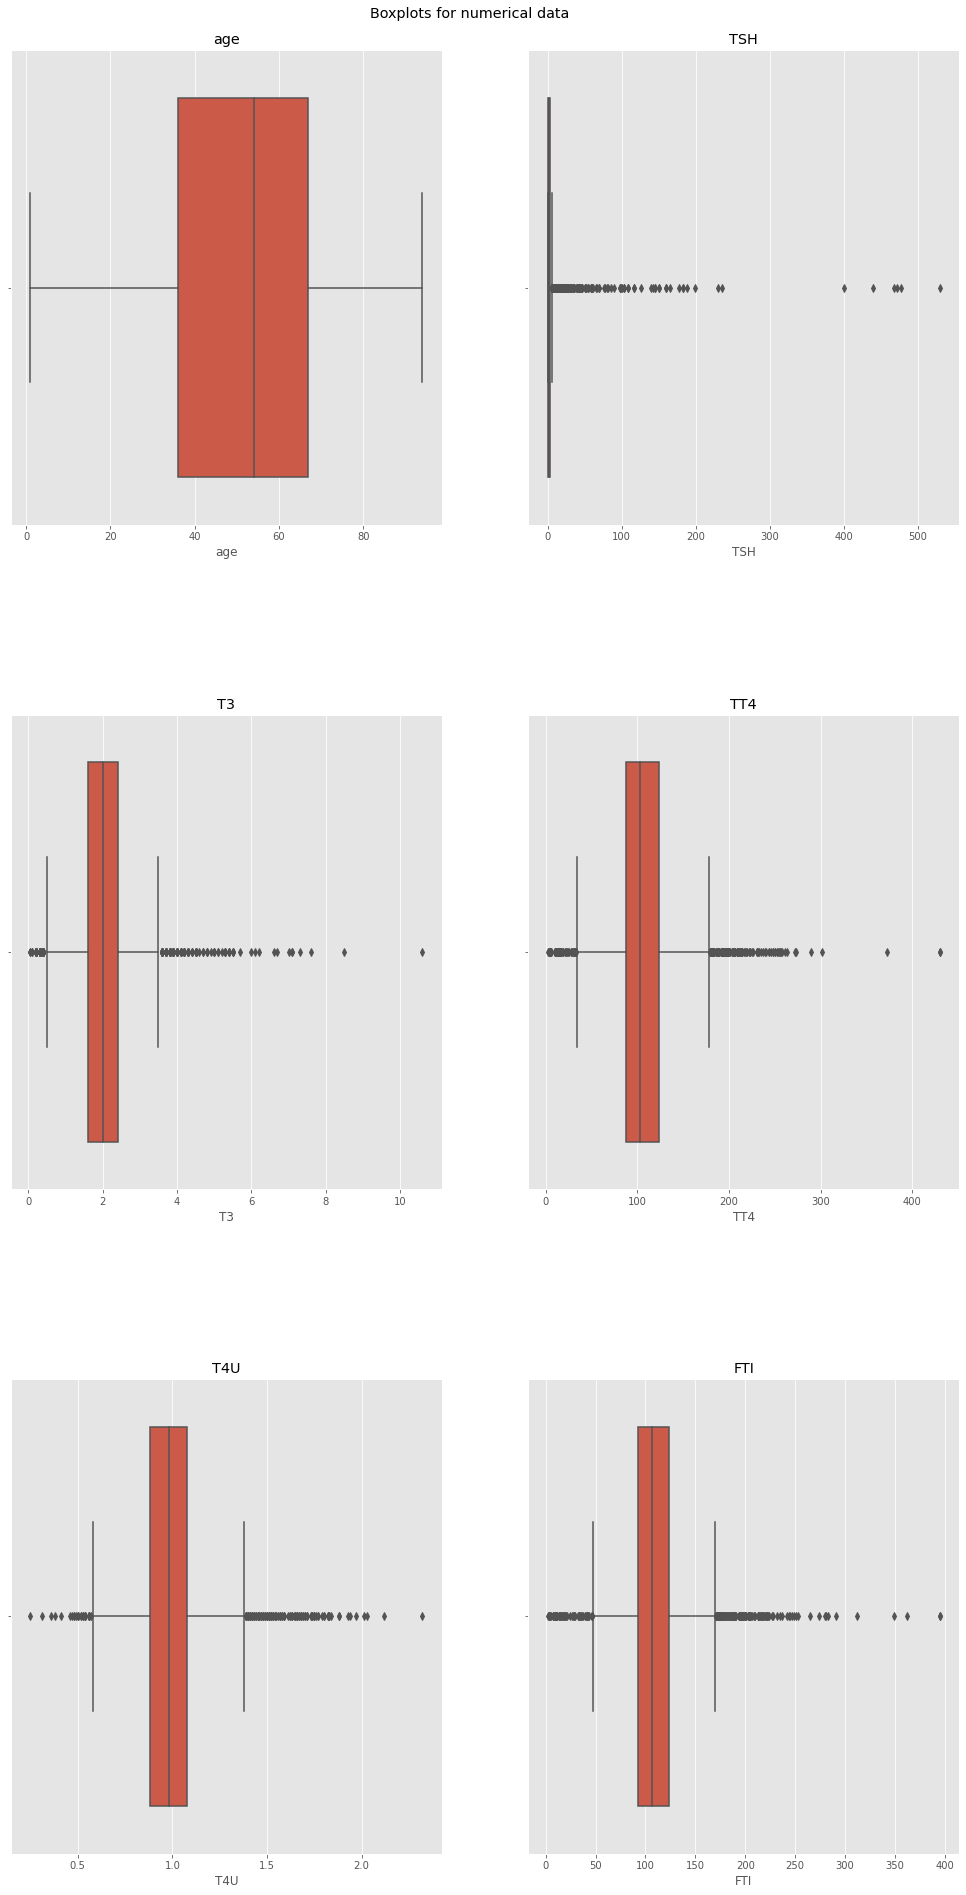

In [ ]:
# Displaying boxplots for numerical data
f, axes = plt.subplots(3,2,figsize=(17,30))
for f,ax in zip(numerical_columns, axes.ravel()):
    sns.boxplot(x=f, data=df, ax=ax)
    ax.set_title(f)
    ax.set_xlabel(f)
plt.suptitle('Boxplots for numerical data', fontsize="x-large")
plt.subplots_adjust(top=0.96,
                    wspace=0.2,
                    hspace=0.4)
plt.show();

In [ ]:
# Counting the number of outliers

def print_n_outliers(df):
    for col in df.select_dtypes(include=['number']).columns:
        column = df[col]
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3-Q1
        lower_lim = Q1 - 1.5 * IQR
        upper_lim = Q3 + 1.5 * IQR
        print(f'The number of outliers in {col} is {len(column[(column >= upper_lim) | (column <= lower_lim)])}.')

print_n_outliers(df)

The number of outliers in age is 0.
The number of outliers in TSH is 372.
The number of outliers in T3 is 189.
The number of outliers in TT4 is 196.
The number of outliers in T4U is 168.
The number of outliers in FTI is 212.


We can see that our other numerial data has quite the few outliers. Decision on what to do with them will be made later on.

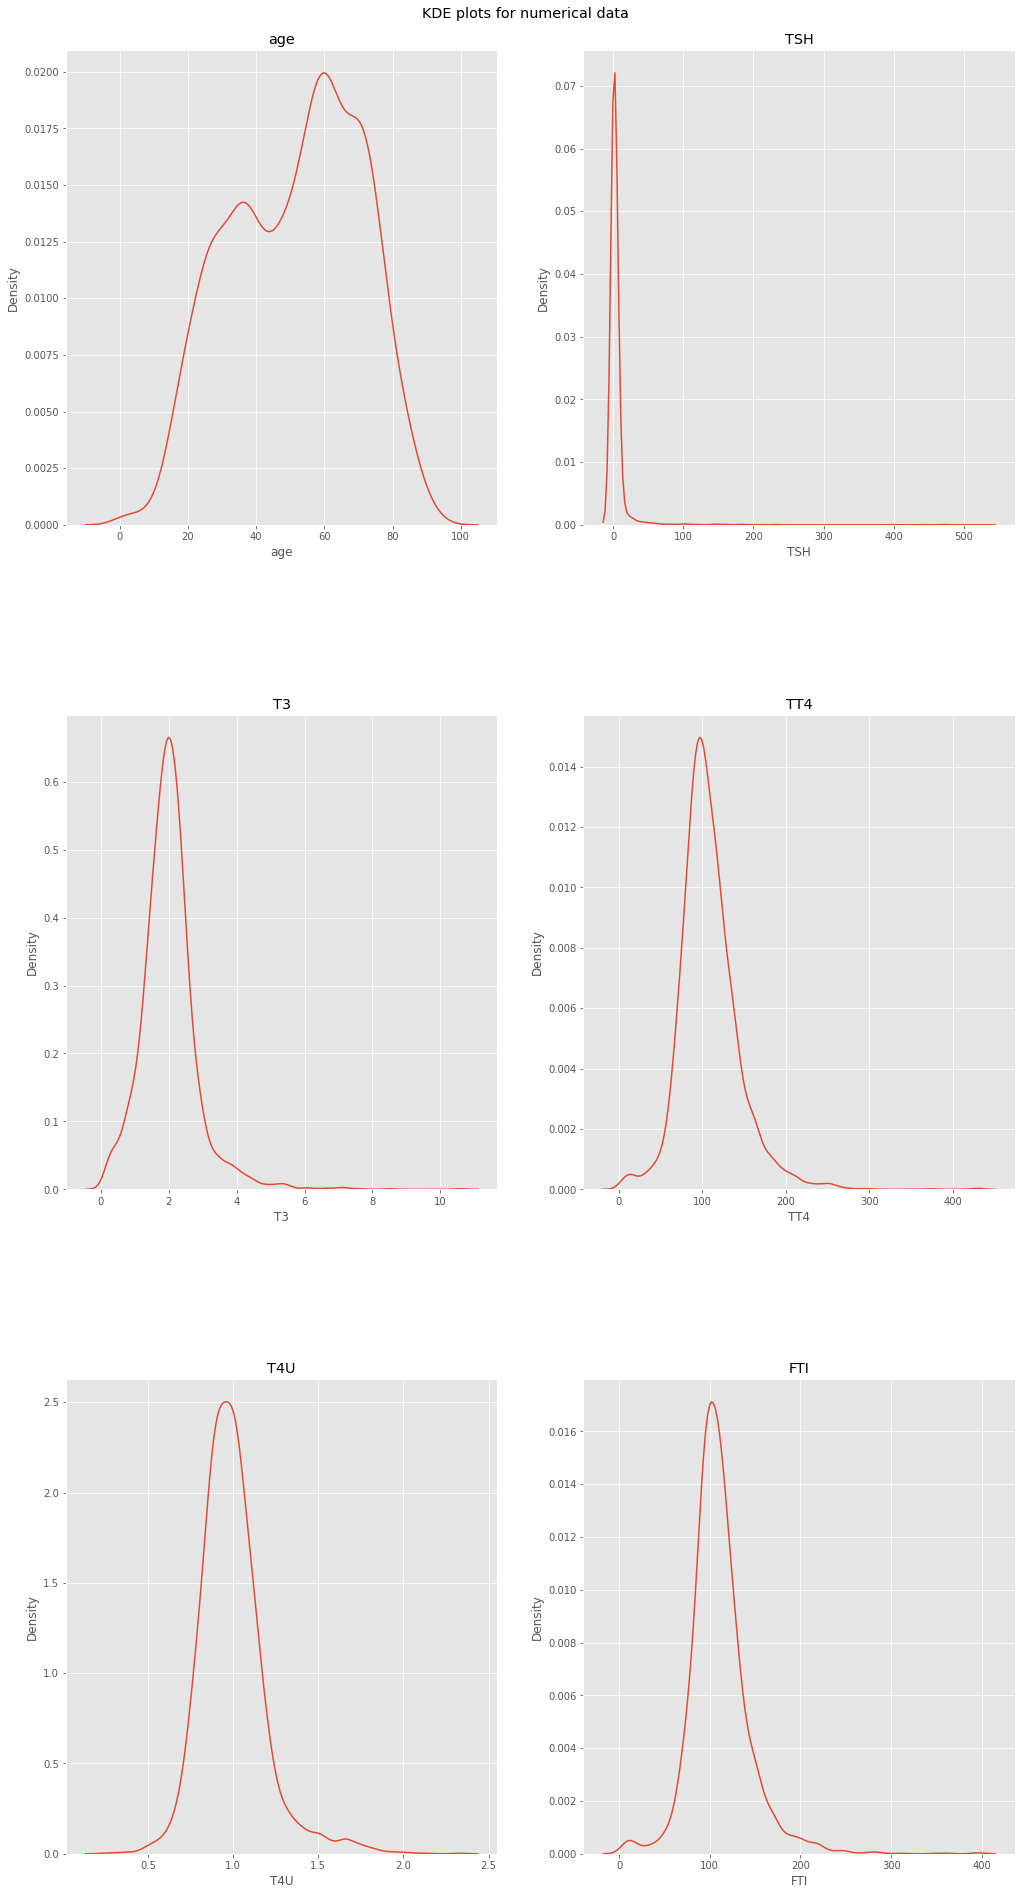

In [ ]:
# Displaying kde for numerical data

f, axes = plt.subplots(3,2,figsize=(17,30))
for f,ax in zip(numerical_columns, axes.ravel()):
    sns.kdeplot(x=f, data=df, ax=ax)
    ax.set_title(f)
    ax.set_xlabel(f)
plt.suptitle('KDE plots for numerical data', fontsize="x-large")
plt.subplots_adjust(top=0.96,
                    wspace=0.2,
                    hspace=0.4)
plt.show();

We chould have also concluded this from the boxplots, but kdeplot gives us the information that our numerical variables except our age are all skewed to the right meaning we have outliers with high results on these variables.

### Target variable

In this section we will check out the target variable and its relationship with the features.

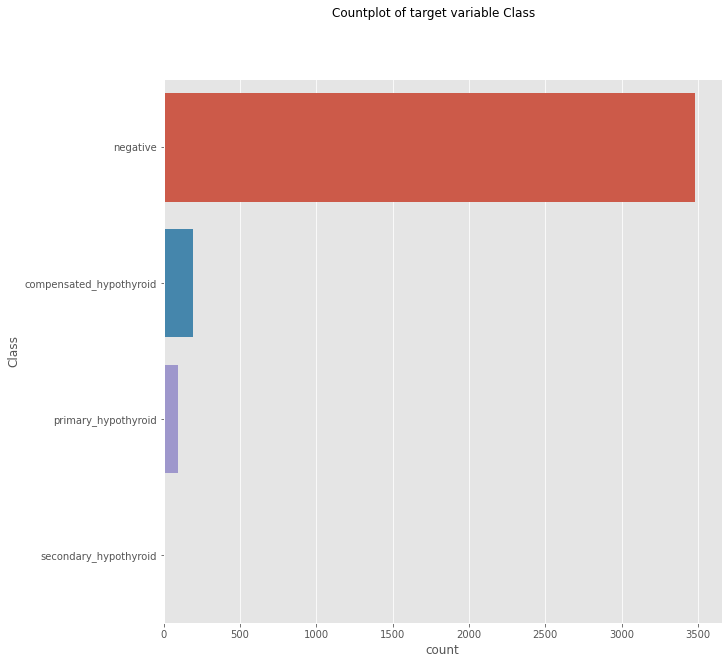

In [ ]:
# Plotting target variable

sns.countplot(y='Class', data=df)
plt.suptitle('Countplot of target variable Class')
plt.show();

It seems what we have a multiclass target variable with four classes not evenly distributed. Most of the cases in this DataFrame are negative results followed by `compensated_hypothyroid`, and the second two classes with least number are `primary_hypothyroid` and `secondary_hypothyroid`.

Having this kind of distribution (low value counts on 3 classes) it will be difficult to visualise the relationship between the target and the features but we will make kdeplots for numerical variables and countplots for categorical ones.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


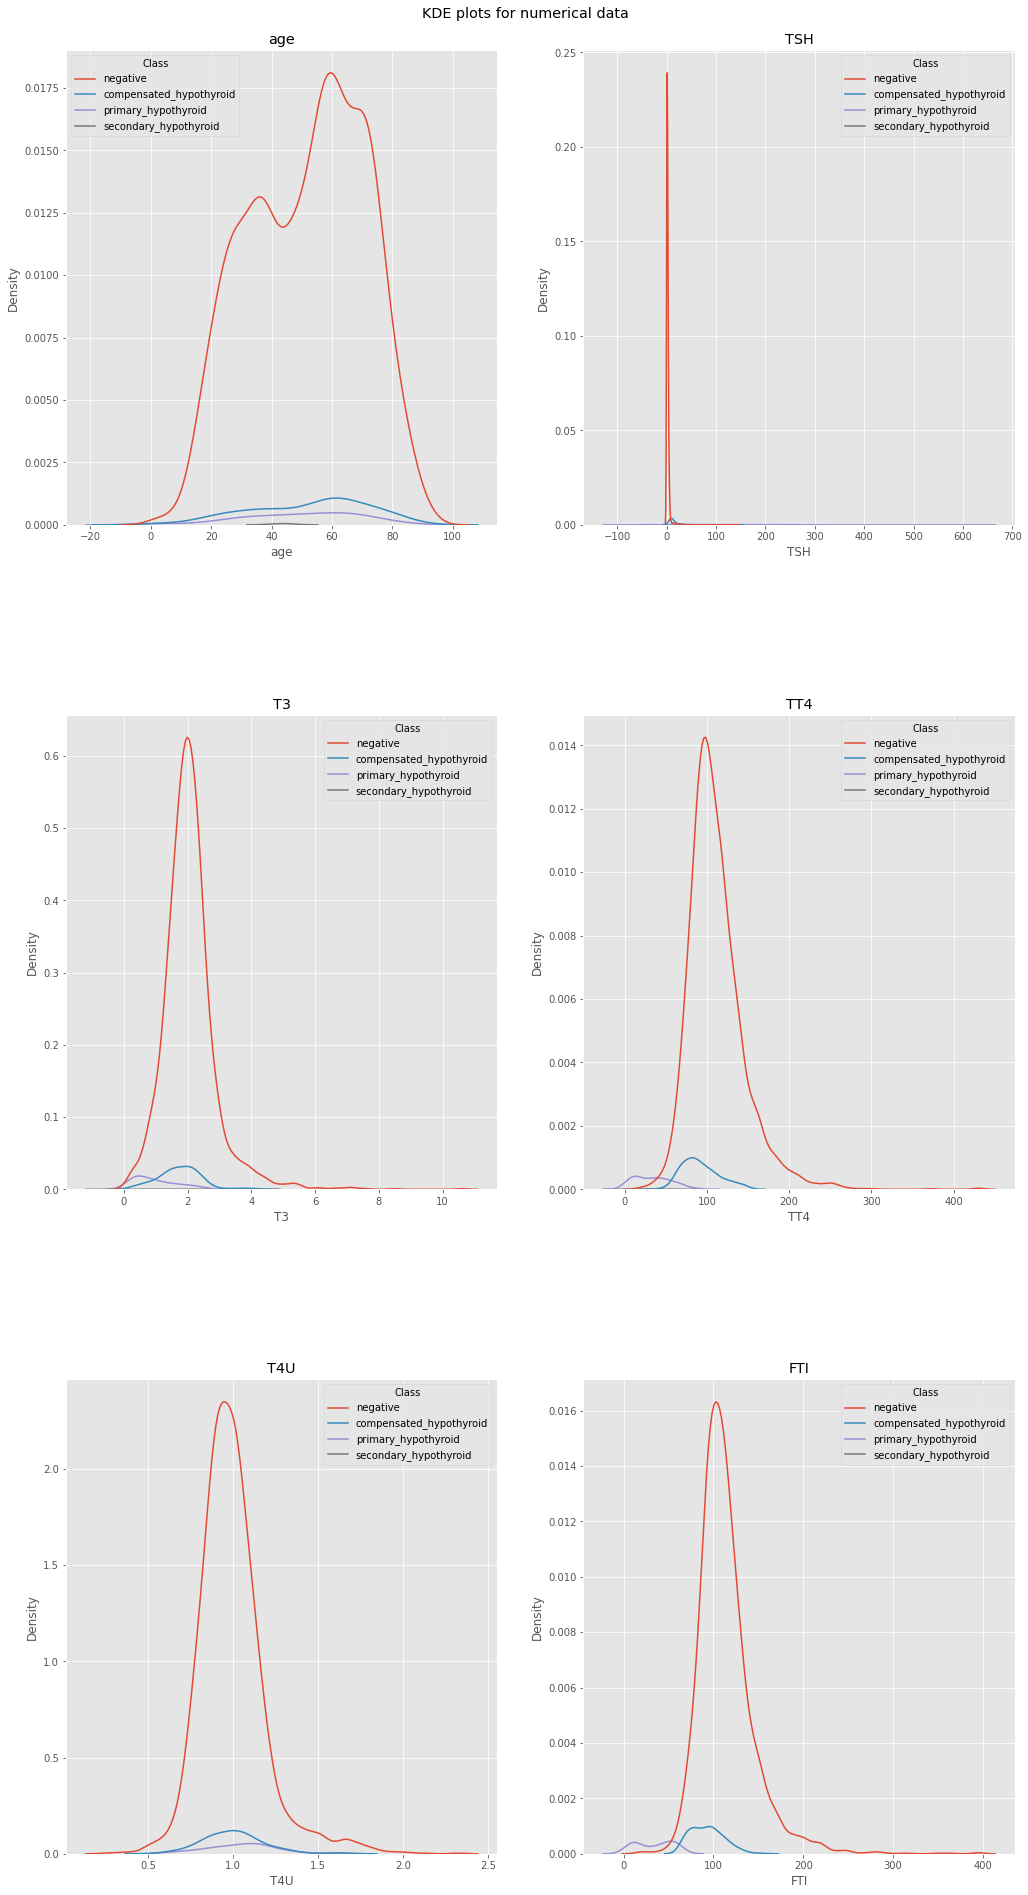

In [ ]:
# KDE plots

f, axes = plt.subplots(3,2,figsize=(17,30))
for f,ax in zip(numerical_columns, axes.ravel()):
    sns.kdeplot(x=f, data=df, ax=ax, hue='Class')
    ax.set_title(f)
    ax.set_xlabel(f)
plt.suptitle('KDE plots for numerical data', fontsize="x-large")
plt.subplots_adjust(top=0.96,
                    wspace=0.2,
                    hspace=0.4)
plt.show();

We can see that `primary_hypothyroid` in a few cases has the lower mean in comparison to the other classes.`primary_hypothyroid` also has very high range on `TSH` feature in comparison to other classes. Having such strange behavior we will ispect it further.

In [ ]:
# Inspecting primary_hypothyroid class

df[df['Class'] == 'primary_hypothyroid']['TSH'].describe()

count     95.000000
mean      91.813684
std      112.070225
min        6.200000
25%       25.000000
50%       47.000000
75%      105.500000
max      530.000000
Name: TSH, dtype: float64

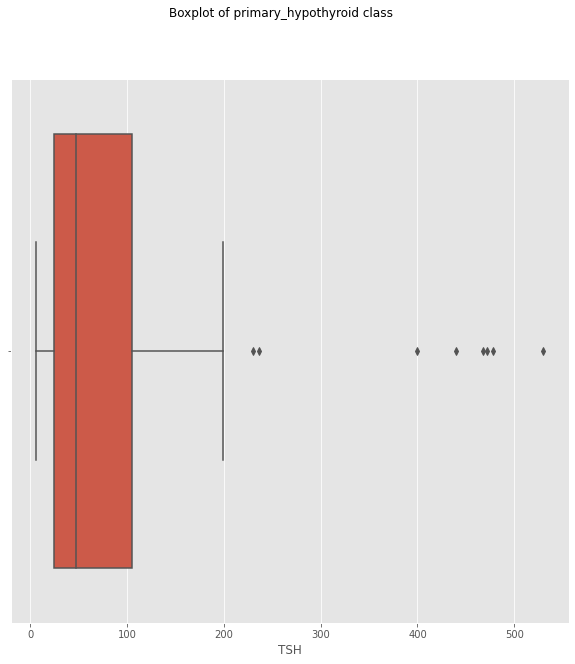

In [ ]:
# Visualizing primary_hypothyroid class

sns.boxplot(x='TSH',
            data=df[df['Class'] == 'primary_hypothyroid']);
plt.suptitle('Boxplot of primary_hypothyroid class')
plt.show();

Looking at the boxplot we can see that those values are in fact real values and also outliers in both the `primary_hypothyroid` subclass and in the whole `Class` variable. We will keep them in the sample because clearly those high values on `TSH` differentiate the `primary_hypothyroid` subclass.

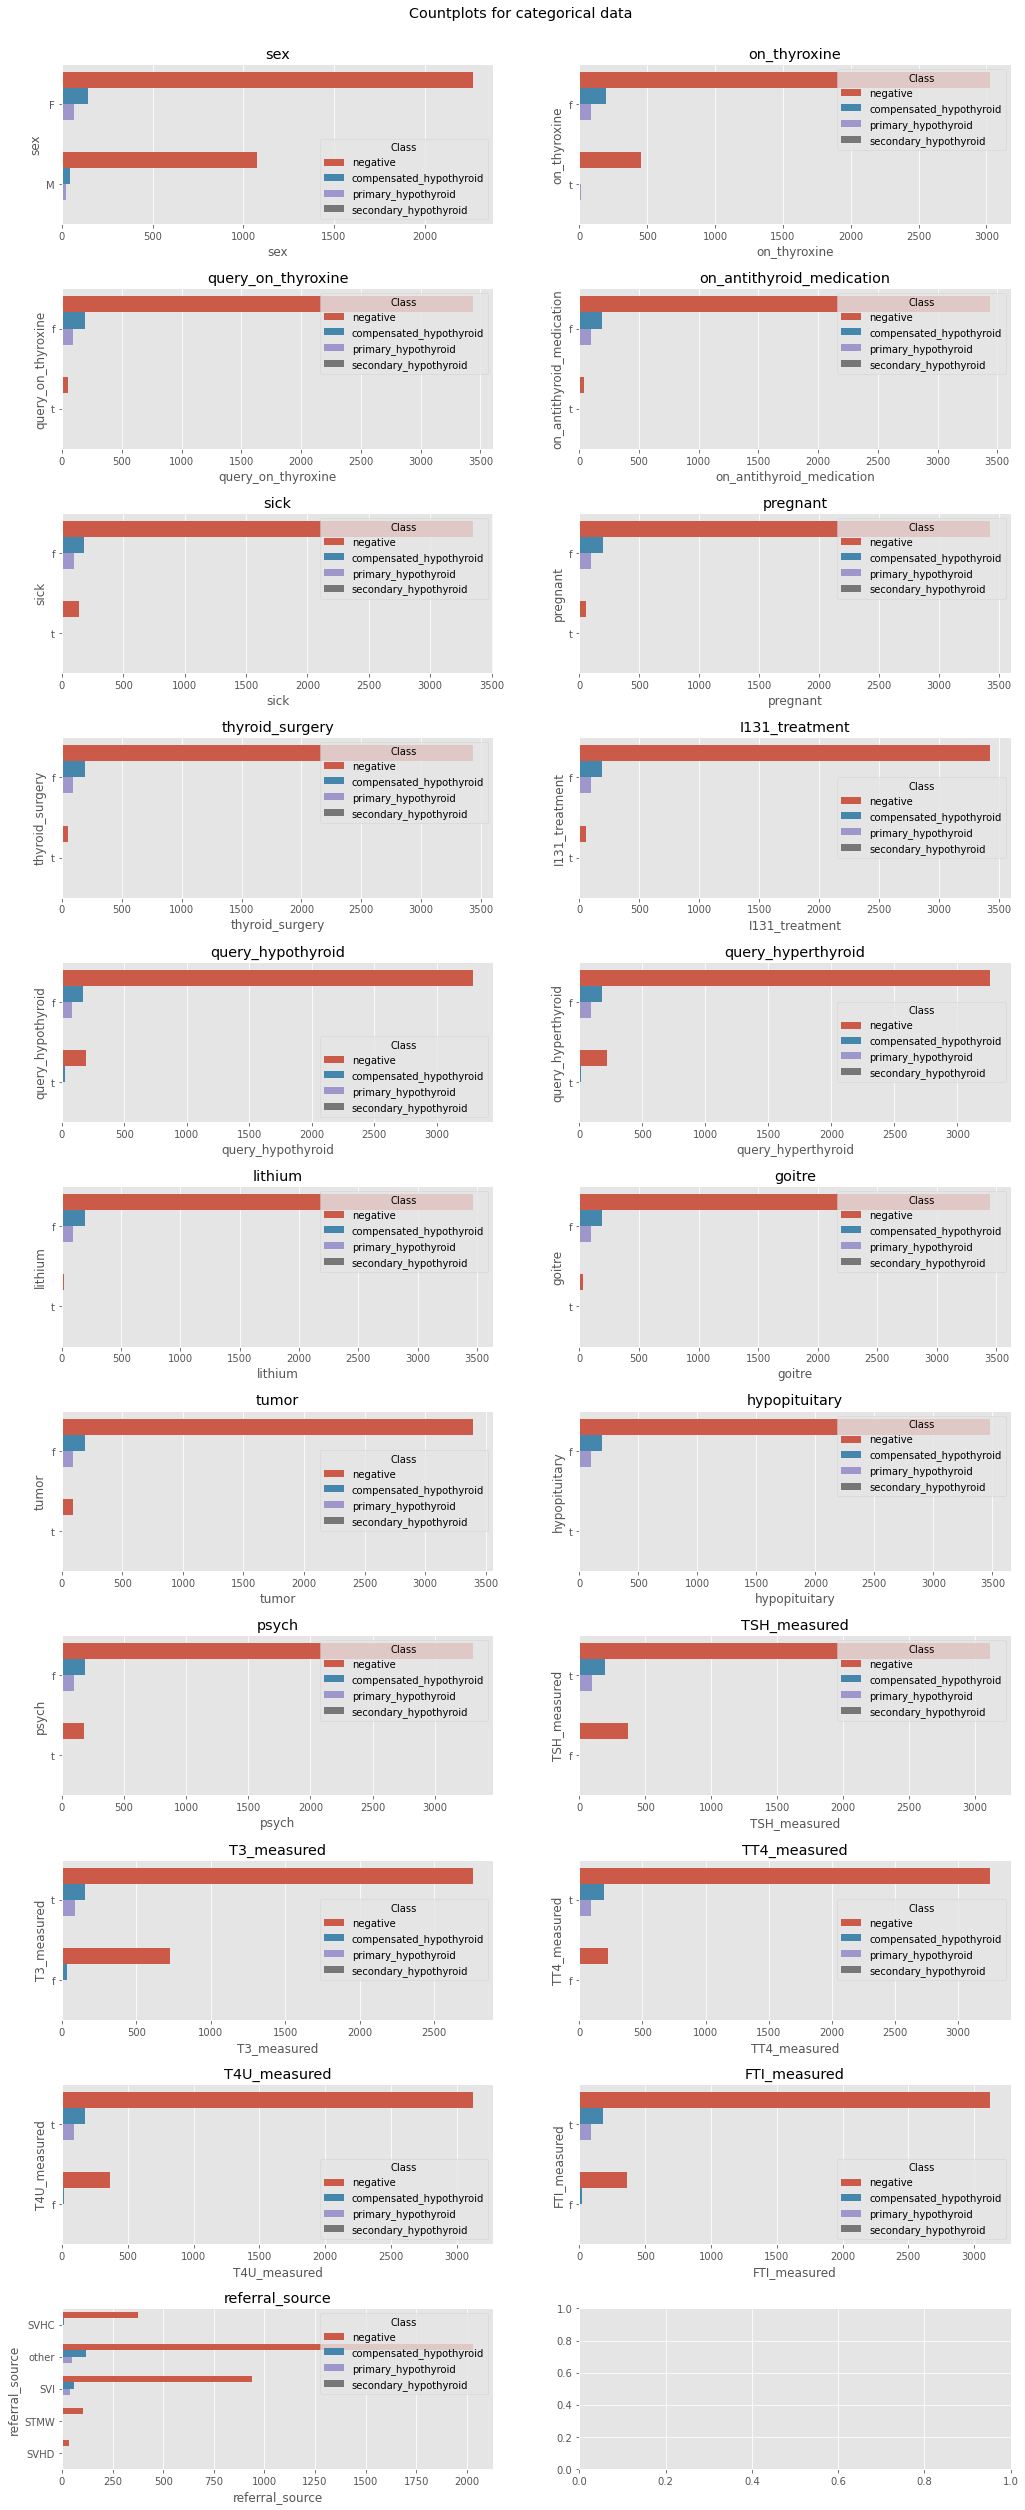

In [ ]:
# Countplots of categorical data

categorical_columns = df.select_dtypes(include='object').drop('Class', axis=1).columns
f, axes = plt.subplots(11,2,figsize=(17,40))
for f,ax in zip(categorical_columns, axes.ravel()):
    sns.countplot(y=f, data=df, ax=ax, hue='Class')
    ax.set_title(f)
    ax.set_xlabel(f)
plt.suptitle('Countplots for categorical data', fontsize="x-large")
plt.subplots_adjust(top=0.96,
                    wspace=0.2,
                    hspace=0.4)
plt.show();

Countplots do not give us many useful information when inspecting the relationship between target and features because the count of negative makes it hard to see details on any other category. We will plot the plots again but limit the x axis.

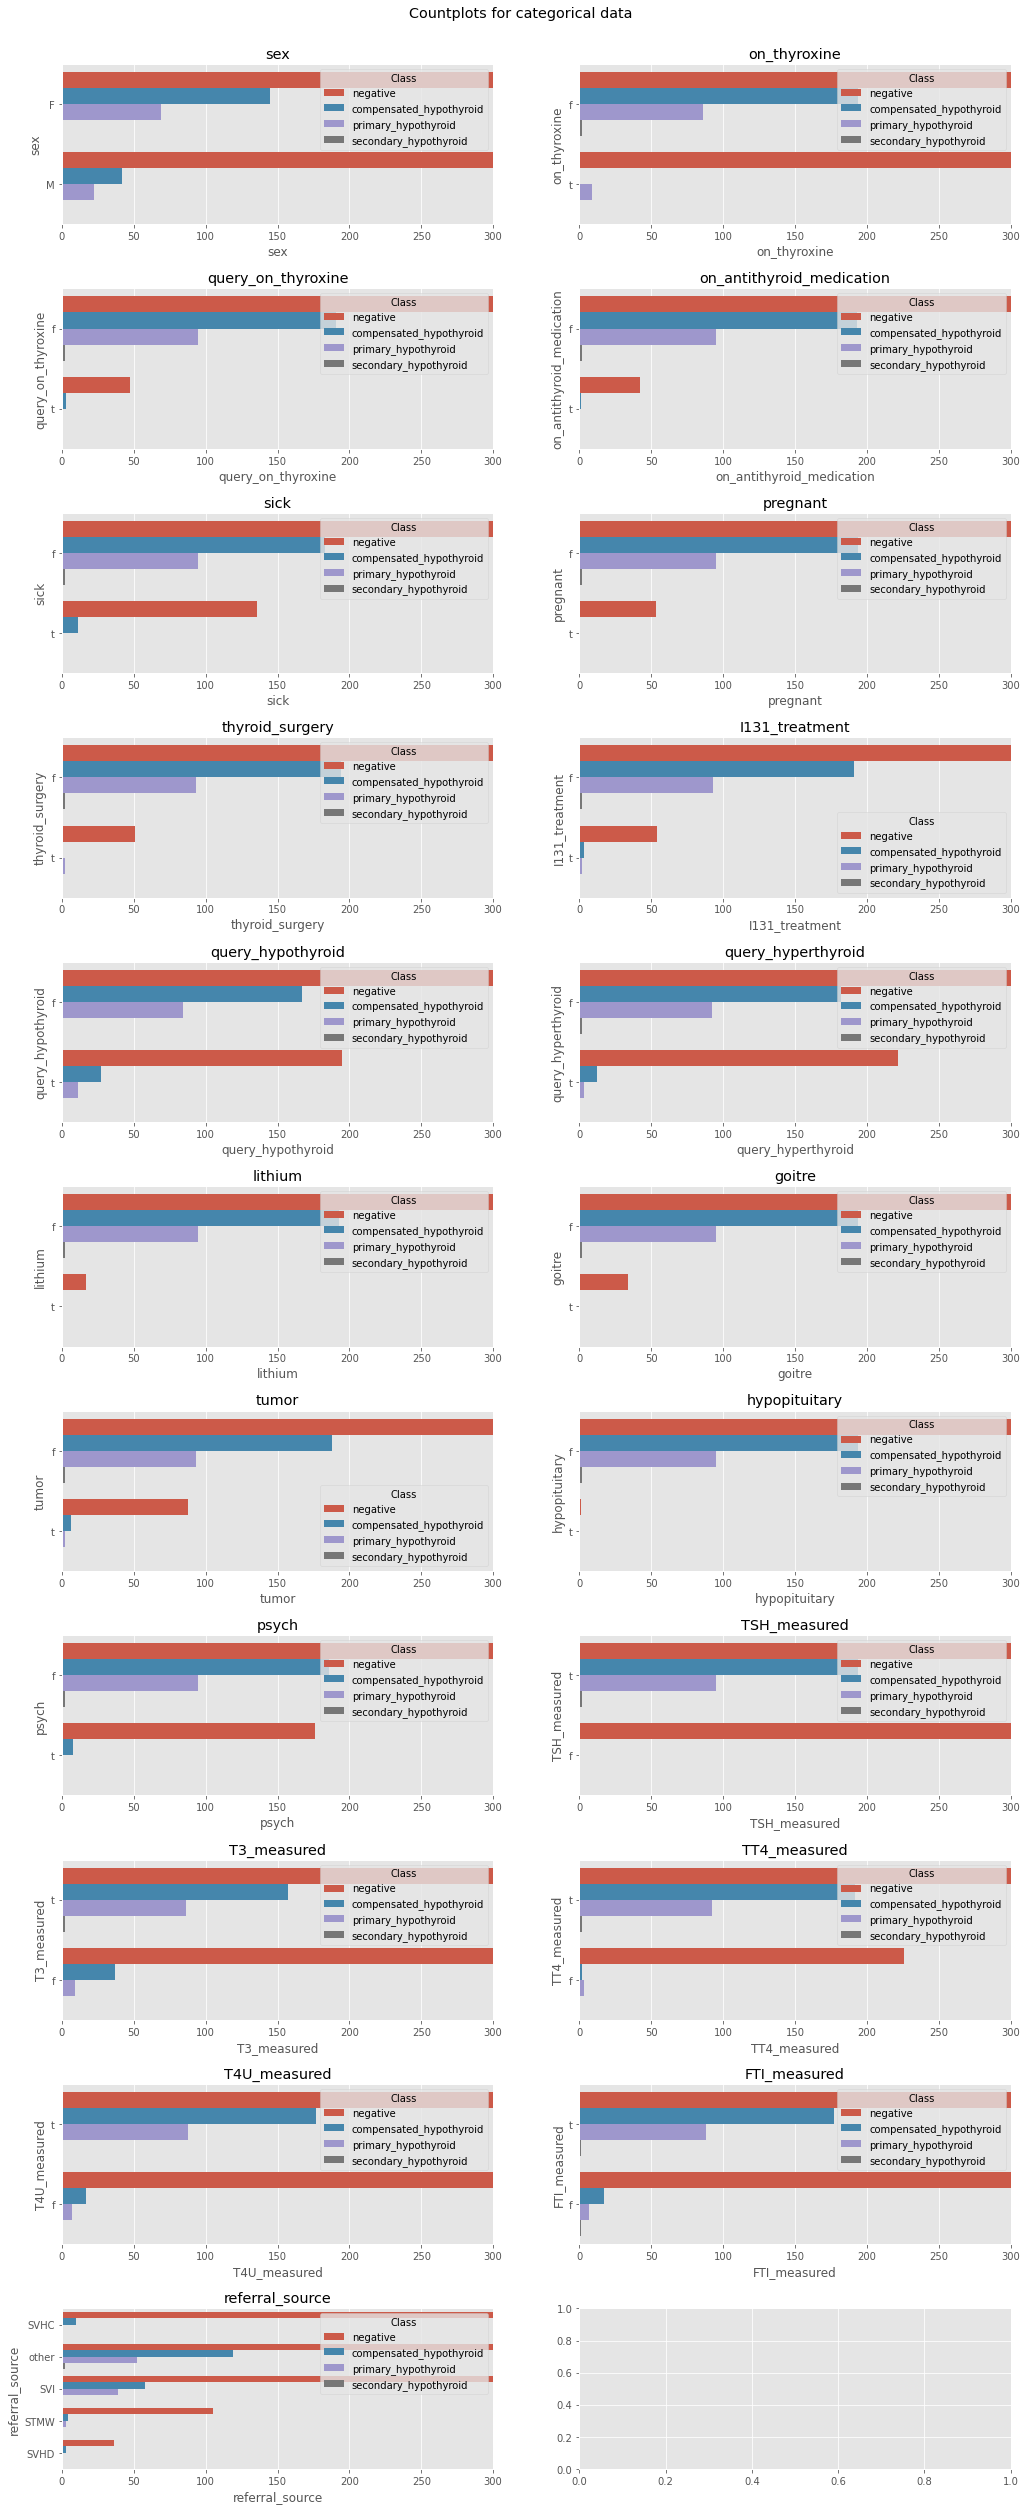

In [ ]:
# Countplots of categorical data

categorical_columns = df.select_dtypes(include='object').drop('Class', axis=1).columns
f, axes = plt.subplots(11,2,figsize=(17,40))
for f,ax in zip(categorical_columns, axes.ravel()):
    sns.countplot(y=f, data=df, ax=ax, hue='Class')
    ax.set_title(f)
    ax.set_xlabel(f)
    ax.set(xlim=(0, 300))
plt.suptitle('Countplots for categorical data', fontsize="x-large")
plt.subplots_adjust(top=0.96,
                    wspace=0.2,
                    hspace=0.4)
plt.show();

## Data preprocessing

In this part of the notebook we will prepare the data for the main analysis.

In [ ]:
# Checking to see if target has missing values

df['Class'].isna().sum()

0

Target does not have any missing data, which means we do not need do drop any of the rows.


In [ ]:
ordinal_features = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych','TSH_measured', 'T3_measured',
       'TT4_measured','T4U_measured', 'FTI_measured']

#df[ordinal_features] = df[ordinal_features].astype('category')

for col in ordinal_features:
  df[col] = df[col].astype('category')

In [ ]:
df[ordinal_features] = df[ordinal_features].apply(lambda x: x.cat.codes)

As all of our ordinal data was actually binary we performed the `.apply(lambda x: x.cat.codes)` on the data points and got values of 1 and 0, where 1 is 't' and 0 is 'f'.

In [ ]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Class
0,41.0,F,0,0,0,0,0,0,0,0,...,1,2.5,1,125.0,1,1.14,1,109.0,SVHC,negative
1,23.0,F,0,0,0,0,0,0,0,0,...,1,2.0,1,102.0,0,NaN,0,NaN,other,negative
2,46.0,M,0,0,0,0,0,0,0,0,...,0,NaN,1,109.0,1,0.91,1,120.0,other,negative
3,70.0,F,1,0,0,0,0,0,0,0,...,1,1.9,1,175.0,0,NaN,0,NaN,other,negative
4,70.0,F,0,0,0,0,0,0,0,0,...,1,1.2,1,61.0,1,0.87,1,70.0,SVI,negative


We will perfrom a `train_test_split()` on the data to get a training and a test data set.

In [ ]:
# Splitting into features and target

X = df.drop('Class', axis=1)
y = df['Class']

# Creating a train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's take a look at our features and missing data, to conclude what to do with them in the preprocessing stage.

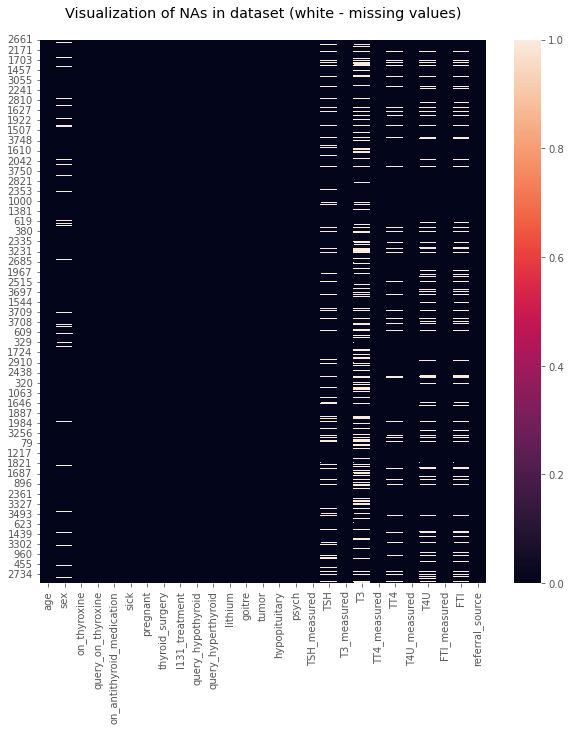

In [ ]:
sns.heatmap(X_train.isna());
plt.title('Visualization of NAs in dataset (white - missing values)\n');

In [ ]:
percent_missing = X_train.isnull().sum() * 100 / len(X_train)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,percent_missing
T3,20.185615
T4U,10.275108
FTI,10.208817
TSH,9.844216
TT4,6.098774
sex,4.076898
age,0.066291
hypopituitary,0.000000
FTI_measured,0.000000
T4U_measured,0.000000


We can see that we have 6 features with missing values, one of them being categorical (`sex`).

Largest percent of missing values is ~20% which is okay to impute. We will use a simple imputer with a strategy of median for the numerical variables and use a fill_value argument for categorical variable to encode the np.nan values with 'missing'.

In [ ]:
# Imputing missing values


categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical.remove('Class')
ordinal = df.select_dtypes(include=['category']).columns.tolist()
numerical = df.select_dtypes(exclude=['category', 'object']).columns.tolist()

# Numerical

numerical_def = gen_features(
    columns=[[c] for c in numerical],
    classes=[
        {'class': SimpleImputer, 'strategy': 'median'},
        {'class': MinMaxScaler}
    ]
)

# Ordinal

ordinal_def = gen_features(
    columns=[[c] for c in ordinal],
    classes=[
        {'class': SimpleImputer, 'strategy': 'most_frequent'}
    ]
)

# Categorical

categorical_def = gen_features(
    columns=[[c] for c in categorical],
    classes=[
        {'class': SimpleImputer, 'strategy': 'constant', 'fill_value': 'missing'},
        {'class': OneHotEncoder, 'class': OneHotEncoder, 'handle_unknown': 'ignore'}
    ]
)

In [ ]:
# Creating a mapper object

features = numerical_def + categorical_def + ordinal_def
mapper = DataFrameMapper(features)
len(features)

27

In [ ]:
# Transforming the variables
X_train_tr = pd.DataFrame(mapper.fit_transform(X_train))
X_test_tr = pd.DataFrame(mapper.transform(X_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

## Logistic regression - one vs rest

In [ ]:
# Creating a model

logreg_onevsall = LogisticRegression(penalty='none', max_iter=6200, solver='saga') #one vs all by default
logreg_onevsall.fit(X_train_tr, y_train)


# Predicting values and probabilites for training data

y_train_pred = logreg_onevsall.predict(X_train_tr)
y_pred_proba = logreg_onevsall.predict_proba(X_train_tr)


LogisticRegression(max_iter=6200, penalty='none', solver='saga')

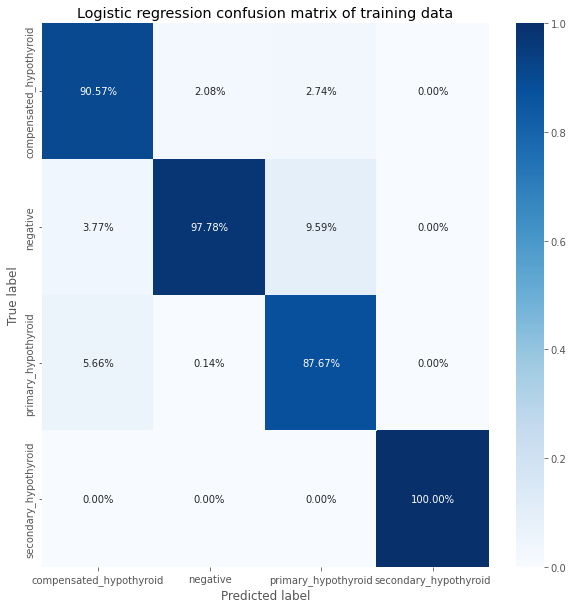

In [ ]:
# Plotting a confusion matrix of training data

conf = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf/np.sum(conf,axis=0),
            annot=True,
            fmt='.2%',
            cmap='Blues',
            yticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']),
            xticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']));
plt.title('Logistic regression confusion matrix of training data');
plt.xlabel('Predicted label');
plt.ylabel('True label');

In [ ]:
conf

array([[  96,   59,    2,    0],
       [   4, 2773,    7,    0],
       [   6,    4,   64,    0],
       [   0,    0,    0,    2]])

In [ ]:
# Classification report of training data

print(classification_report(y_train, y_train_pred, target_names=['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.91      0.61      0.73       157
               negative       0.98      1.00      0.99      2784
    primary_hypothyroid       0.88      0.86      0.87        74
  secondary_hypothyroid       1.00      1.00      1.00         2

               accuracy                           0.97      3017
              macro avg       0.94      0.87      0.90      3017
           weighted avg       0.97      0.97      0.97      3017



From the classification report and confusion matrix we can conclude that this model does a relatively good job at predicting `negative`, `primary_hypothyroid` and `secondary_hypothyroid` but struggles with `compensated_hypothyroid`. With this being highly imbalanced data set in terms of classes (`negative` having much more values than any other class) we will ispect this classification with mostly recall and precision as they are of most interest and they are not affected by different groups sizes. Recall is of most interest to us as it shows us the percentage of TP being correctly classified. Low recall on `compensated_hypothyroid` means we had 64% of cases in this class correctly classified. This is a low performance considering these patients are under a threat of developing even worse condition, and considering that incorrectly classified cases were classified as `negative`. This model should be improved upon or we should even consider creating another model. Before that, let's try to see how is it performing on the test data.

In [ ]:
# Test data on logistic regression

y_test_pred = logreg_onevsall.predict(X_test_tr)
y_test_proba = logreg_onevsall.predict_proba(X_test_tr)


In [ ]:
# Raw confusion matrix
conf = confusion_matrix(y_test, y_test_pred)
conf

array([[ 18,  19,   0],
       [  2, 694,   1],
       [  4,   1,  16]])

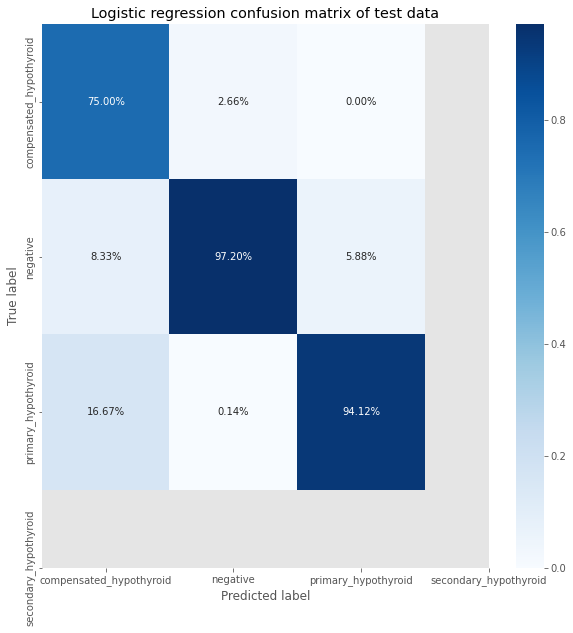

In [ ]:
# Confusion matrix of test data

sns.heatmap(conf/np.sum(conf,axis=0),
            annot=True,
            fmt='.2%',
            cmap='Blues',
            yticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']),
            xticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']));
plt.title('Logistic regression confusion matrix of test data');
plt.xlabel('Predicted label');
plt.ylabel('True label');

In [ ]:
print(classification_report(y_test, y_test_pred, target_names=['compensated_hypothyroid','negative','primary_hypothyroid']))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.75      0.49      0.59        37
               negative       0.97      1.00      0.98       697
    primary_hypothyroid       0.94      0.76      0.84        21

               accuracy                           0.96       755
              macro avg       0.89      0.75      0.81       755
           weighted avg       0.96      0.96      0.96       755



From the test data we can see that our model deffinitely underperforms. Now we get even lower recall on `compensated_hypothyroid` and our `primary_hypothyroid` recall has also lower values. From the raw data we can even see that our model even classified some healthy(`negative`) patients as being `secondary_hypothyroid` which we did not even have in the test data set.

### Tuning hyperparameters on logistic regression

To improve upon this model we can try and tune the hyperparameters of the model. The baseline model was without any penalty but it supports both L1, L2 and also elastic net so we will try to grid search between these four options. In the grid search cross validation we will also search for the optimal hyperparameter C which tells us how strong should the regularisation be. Instead of lbfgs solver we will use a saga solver that allows us to perform all three of the regularisaton methods.

In [ ]:
# Instantiating a logistic regression model

log_reg_ova = LogisticRegression(solver='saga', random_state = 42)

In [ ]:
# Parameters of logistic regression

log_reg_ova.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
# Creating a parameter grid to search over

param_grid = {'C': np.logspace(-4, 4, 50),
              'penalty': ['l1', 'l2', 'elasticnet']}


Given there are highly unabalanced classes in the target variable we will look to get the highest scores on `'recall_macro'` as we would not like to miss correctly classifing any of the people who really have the disease and those are the classes that have substantially less cases than `negative`.

In [ ]:
# Creating a grid search

clf_GS = GridSearchCV(log_reg_ova, param_grid, scoring='recall_macro')


In [ ]:
# Fitting the grid search

clf_GS.fit(X_train_tr, y_train)

In [ ]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['C'])
print()
print(clf_GS.best_estimator_.get_params())

Best Penalty: l1
Best C: 51.79474679231202

{'C': 51.79474679231202, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


On the `recall_macro` scoring parameter we get the results that the best C parameter is 51.79474679231202 and the best penalty is L1 regularization (Lasso).

Let's now compute the metrics for this model on train and on test data.


In [ ]:
logreg_best_params = LogisticRegression(max_iter = 3000, penalty='l1', C=51.79474679231202, solver='saga', random_state = 42)
logreg_best_params.fit(X_train_tr, y_train)

LogisticRegression(C=51.79474679231202, max_iter=3000, penalty='l1',
                   random_state=42, solver='saga')

In [ ]:
# Predicting for train data

y_train_pred_bp = logreg_best_params.predict(X_train_tr)
y_pred_proba_bp = logreg_best_params.predict_proba(X_train_tr)


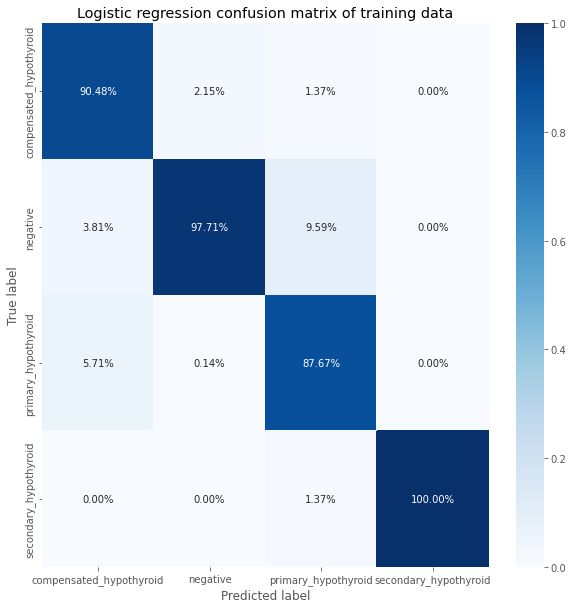

In [ ]:
# Plotting a confusion matrix of training data

conf = confusion_matrix(y_train, y_train_pred_bp)
sns.heatmap(conf/np.sum(conf,axis=0),
            annot=True,
            fmt='.2%',
            cmap='Blues',
            yticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']),
            xticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']));
plt.title('Logistic regression confusion matrix of training data');
plt.xlabel('Predicted label');
plt.ylabel('True label');

In [ ]:
conf

array([[  95,   61,    1,    0],
       [   4, 2773,    7,    0],
       [   6,    4,   64,    0],
       [   0,    0,    1,    1]])

In [ ]:
# Printing metrics for train data
print('----- Baseline model -----')
print(classification_report(y_train, y_train_pred, target_names=['compensated_hypothyroid','negative','primary_hypothyroid', 'secondary_hypothyroid']))

print('----- GridSearchCV model with regularization -----')
print(classification_report(y_train, y_train_pred_bp, target_names=['compensated_hypothyroid','negative','primary_hypothyroid', 'secondary_hypothyroid']))



----- Baseline model -----
                         precision    recall  f1-score   support

compensated_hypothyroid       0.94      0.69      0.79       157
               negative       0.98      1.00      0.99      2784
    primary_hypothyroid       0.92      0.93      0.93        74
  secondary_hypothyroid       1.00      1.00      1.00         2

               accuracy                           0.98      3017
              macro avg       0.96      0.90      0.93      3017
           weighted avg       0.98      0.98      0.98      3017

----- GridSearchCV model with regularization -----
                         precision    recall  f1-score   support

compensated_hypothyroid       0.90      0.61      0.73       157
               negative       0.98      1.00      0.99      2784
    primary_hypothyroid       0.88      0.86      0.87        74
  secondary_hypothyroid       1.00      0.50      0.67         2

               accuracy                           0.97      3017
       

Comparing the baseline model and model we got from GridSearchCV we can see that metrics have not really changed.

Let's try predicting the test data with this model to see what is the case there.

In [ ]:
# Fitting the best parameter model to the test data

y_test_pred_bp = logreg_best_params.predict(X_test_tr)
y_test_proba_bp = logreg_best_params.predict_proba(X_test_tr)

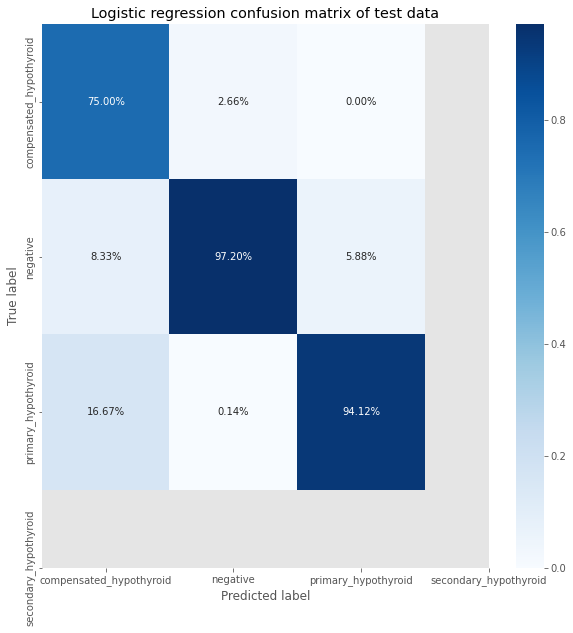

In [ ]:
# Confusion matrix of test data

conf = confusion_matrix(y_test, y_test_pred_bp)
sns.heatmap(conf/np.sum(conf,axis=0),
            annot=True,
            fmt='.2%',
            cmap='Blues',
            yticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']),
            xticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']));
plt.title('Logistic regression confusion matrix of test data');
plt.xlabel('Predicted label');
plt.ylabel('True label');

In [ ]:
conf

array([[ 18,  19,   0],
       [  2, 694,   1],
       [  4,   1,  16]])

In [ ]:
# Printing metrics for test data
print('----- Baseline model -----')
print(classification_report(y_test, y_test_pred, target_names=['compensated_hypothyroid','negative','primary_hypothyroid']))
print('----- GridSearchCV model with regularization -----')
print(classification_report(y_test, y_test_pred_bp, target_names=['compensated_hypothyroid','negative','primary_hypothyroid']))



----- Baseline model -----
                         precision    recall  f1-score   support

compensated_hypothyroid       0.75      0.49      0.59        37
               negative       0.97      1.00      0.98       697
    primary_hypothyroid       0.94      0.76      0.84        21

               accuracy                           0.96       755
              macro avg       0.89      0.75      0.81       755
           weighted avg       0.96      0.96      0.96       755

----- GridSearchCV model with regularization -----
                         precision    recall  f1-score   support

compensated_hypothyroid       0.75      0.49      0.59        37
               negative       0.97      1.00      0.98       697
    primary_hypothyroid       0.94      0.76      0.84        21

               accuracy                           0.96       755
              macro avg       0.89      0.75      0.81       755
           weighted avg       0.96      0.96      0.96       755



The results for both the baseline model and the model with the GridSearchCV is virtually the same.

In [ ]:
# Print macro and micro precision score

print(f"Micro precision score is: {precision_score(y_test, y_test_pred_bp, average='micro')}")
print(f"Macro precision score is: {precision_score(y_test, y_test_pred_bp, average='macro')}")

Micro precision score is: 0.9642384105960264
Macro precision score is: 0.8877217553688143


In [ ]:
# Print macro and micro recall score

print(f"Micro  recall score is: {recall_score(y_test, y_test_pred_bp, average='micro')}")
print(f"Macro  recall score is: {recall_score(y_test, y_test_pred_bp, average='macro')}")


Micro  recall score is: 0.9642384105960264
Macro  recall score is: 0.7480290292341941


The final logistic regression model we got from using the GridSearchCV has a macro recall of 0.7480290292341941 and micro recall of 0.9642384105960264 on our test set. These result could be improved upon but looking at the confusion matrix of the test data we can see that the most problematic are the cases of `compensated_hypothyroid` and `primary_hypothyroid` being classified as `negative` and we have only 3 cases of them in this model (2 being `compensated_hypothyroid` and 1 being `primary_hypothyroid`. Other cases where `negative` is classified wrong is not a big problem, and also if different diseases are classified wrong from each other is not a problem. This was an attempt to classify these cases with `LogisticRegression()` function which is default One vs Rest. Next, we will try to classify these cases with KNN classifier.

## K-Nearest Neighbours

In [ ]:
# Creating a baseline model

knn_baseline = KNeighborsClassifier()

In [ ]:
# Fit the baseline model to the training data

knn_baseline.fit(X_train_tr, y_train)

KNeighborsClassifier()

In [ ]:
# Predict on train data
y_train_pred = knn_baseline.predict(X_train_tr)

<ipython-input-175-a68c8c9260de>:3: RuntimeWarning: invalid value encountered in true_divide
  sns.heatmap(conf/np.sum(conf,axis=0),


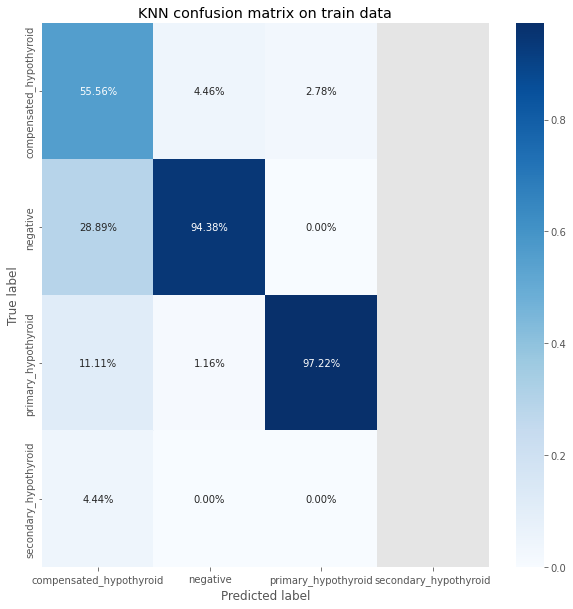

In [ ]:
# Confusion matrix
conf = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf/np.sum(conf,axis=0),
            annot=True,
            fmt='.2%',
            cmap='Blues',
            yticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']),
            xticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']));
plt.title('KNN confusion matrix on train data');
plt.xlabel('Predicted label');
plt.ylabel('True label');

In [ ]:
conf

array([[  25,  131,    1,    0],
       [  13, 2771,    0,    0],
       [   5,   34,   35,    0],
       [   2,    0,    0,    0]])

In [ ]:
print(classification_report(y_train, y_train_pred, target_names=['compensated_hypothyroid','negative','primary_hypothyroid','secondary_thyroid']))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.56      0.16      0.25       157
               negative       0.94      1.00      0.97      2784
    primary_hypothyroid       0.97      0.47      0.64        74
      secondary_thyroid       0.00      0.00      0.00         2

               accuracy                           0.94      3017
              macro avg       0.62      0.41      0.46      3017
           weighted avg       0.92      0.94      0.92      3017



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the metrics we got on this baseline KNN algorithm we can conclude that it is worse than the baseline logistic for this problem. There is a way to try and improve it and we will in this case use the GridSearchCV also.

### Tuning hyperparameters on the KNN classifier model

In [ ]:
# Chossing parameters for GridSearchCV

param_grid = {'n_neighbors' : [*range(1, 17, 2)],
              'weights' : ['uniform', 'distance'],
              'p' : [1,2]}

In [ ]:
# Creating a GridSearchCV object

clf_GS_knn = GridSearchCV(knn_baseline, param_grid, scoring='recall_macro')

In [ ]:
# Fitting the data

clf_GS_knn.fit(X_train_tr, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behav

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='recall_macro')

In [ ]:
# Finding the best parameters

print('Best n of neighbours:', clf_GS_knn.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', clf_GS_knn.best_estimator_.get_params()['weights'])
print('Best p:', clf_GS_knn.best_estimator_.get_params()['p'])
print()
print(clf_GS_knn.best_estimator_.get_params())

Best n of neighbours: 3
Best weights: distance
Best p: 1

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


After we got the scores from the GridSearchCV let's create a model with this parameters and see the scores for it.

We can see that `weights` changed from default `uniform` to `distance` and `p` changed from default `2` to `1`,

In [ ]:
knn_best_params = KNeighborsClassifier(n_neighbors=3,weights='distance',p=1)
knn_best_params.fit(X_train_tr, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [ ]:
# Predicting the train data

y_train_pred_knnbp = knn_best_params.predict(X_train_tr)

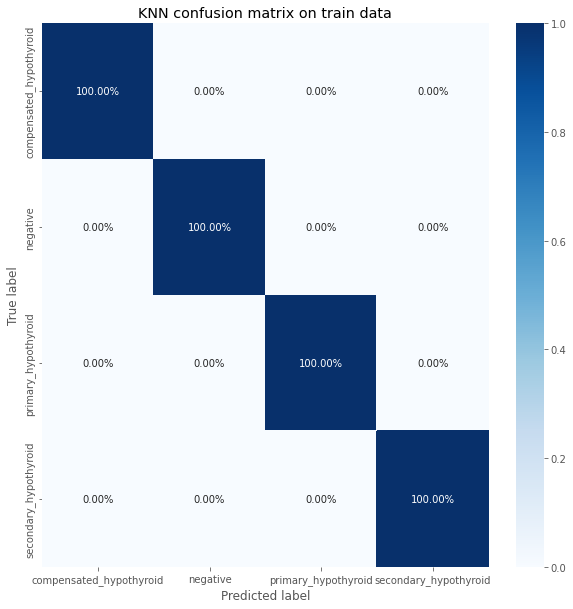

In [ ]:
# Confusion matrix of the GridSearchCV KNN classifier

conf = confusion_matrix(y_train, y_train_pred_knnbp)
sns.heatmap(conf/np.sum(conf,axis=0),
            annot=True,
            fmt='.2%',
            cmap='Blues',
            yticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']),
            xticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']));
plt.title('KNN confusion matrix on train data');
plt.xlabel('Predicted label');
plt.ylabel('True label');


In [ ]:
conf

array([[ 157,    0,    0,    0],
       [   0, 2784,    0,    0],
       [   0,    0,   74,    0],
       [   0,    0,    0,    2]])

Differently from any model before, this model on the train data classifies every single row correctly. To see if the data is totally overfit or not let's see how it performs on the test data.

In [ ]:
# Predicting the test data

y_test_pred_knnbp = knn_best_params.predict(X_test_tr)

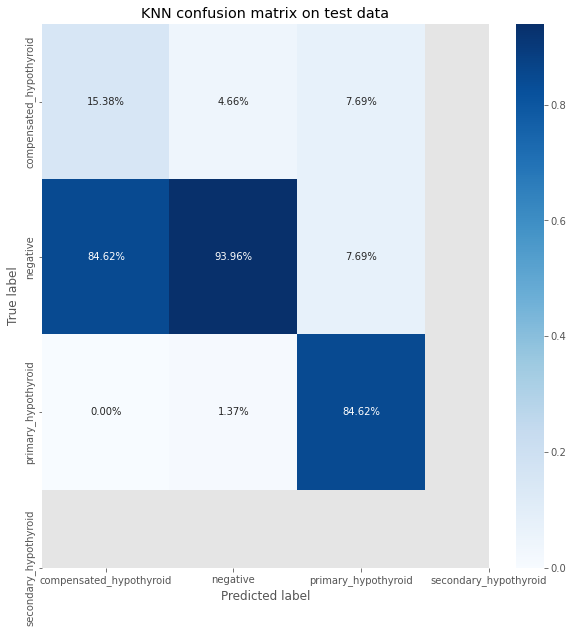

In [ ]:
# Confusion matrix of the GridSearchCV KNN classifier on test data

conf = confusion_matrix(y_test, y_test_pred_knnbp)
sns.heatmap(conf/np.sum(conf,axis=0),
            annot=True,
            fmt='.2%',
            cmap='Blues',
            yticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']),
            xticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']));
plt.title('KNN confusion matrix on test data');
plt.xlabel('Predicted label');
plt.ylabel('True label');

In [ ]:
conf

array([[  2,  34,   1],
       [ 11, 685,   1],
       [  0,  10,  11]])

As we can see, the results are not as great as they are on the training data because we have 11 cases from `compensated_hypothyroid` and one from `primary_hypothyroid` being classified as `negative`. Either way, we will calculate the metrics for this model.

In [ ]:
print(classification_report(y_test, y_test_pred_knnbp, target_names=['compensated_hypothyroid','negative','primary_hypothyroid']))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.15      0.05      0.08        37
               negative       0.94      0.98      0.96       697
    primary_hypothyroid       0.85      0.52      0.65        21

               accuracy                           0.92       755
              macro avg       0.65      0.52      0.56       755
           weighted avg       0.90      0.92      0.91       755



In [ ]:
# Print macro and micro recall score

print(f"Micro  recall score is: {recall_score(y_test, y_test_pred_knnbp, average='micro')}")
print(f"Macro  recall score is: {recall_score(y_test, y_test_pred_knnbp, average='macro')}")


Micro  recall score is: 0.9245033112582781
Macro  recall score is: 0.520215645036305


KNN classificaton model even with GridSearchCV underperforms the default logistic regression model. For this case, it might be benficial to try implementing One vs One approach because of the highly imbalanced classes.

Next section will contain this.

## One vs One logistic regression

In [ ]:
# Creating One vs One logistic regression
log_reg_ovo = OneVsOneClassifier(LogisticRegression(penalty='none',max_iter = 5000, solver='saga'))

In [ ]:
# Fitting the data to the model

log_reg_ovo.fit(X_train_tr, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=5000, penalty='none',
                                                solver='saga'))

In [ ]:
# Predicting on the train set

y_train_pred_ovo = log_reg_ovo.predict(X_train_tr)

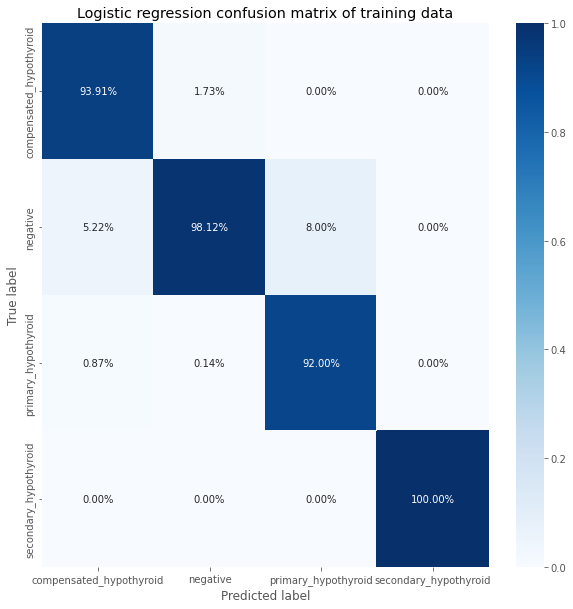

In [ ]:
# Plotting the conf matrix

conf = confusion_matrix(y_train, y_train_pred_ovo)
sns.heatmap(conf/np.sum(conf,axis=0),
            annot=True,
            fmt='.2%',
            cmap='Blues',
            yticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']),
            xticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']));
plt.title('Logistic regression confusion matrix of training data');
plt.xlabel('Predicted label');
plt.ylabel('True label');

In [ ]:
# Raw confusion matrix

conf

array([[ 108,   49,    0,    0],
       [   6, 2772,    6,    0],
       [   1,    4,   69,    0],
       [   0,    0,    0,    2]])

This OneVsOne model seem promising, it only missed 12 values which we would like to avoid (6 from `compensated_hypothyroid` being classified as `negative` and also 6 from `primary_hypothyroid` being classified `negative`).

Let's print out classification report and get recall scores, and after that we will try to predict on the test data.

In [ ]:
# Classification report

print(classification_report(y_train, y_train_pred_ovo, target_names=['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']))

print(f"Micro  recall score is: {recall_score(y_train, y_train_pred_ovo, average='micro')}")
print(f"Macro  recall score is: {recall_score(y_train, y_train_pred_ovo, average='macro')}")


                         precision    recall  f1-score   support

compensated_hypothyroid       0.94      0.69      0.79       157
               negative       0.98      1.00      0.99      2784
    primary_hypothyroid       0.92      0.93      0.93        74
  secondary_hypothyroid       1.00      1.00      1.00         2

               accuracy                           0.98      3017
              macro avg       0.96      0.90      0.93      3017
           weighted avg       0.98      0.98      0.98      3017

Micro  recall score is: 0.9781239642028505
Macro  recall score is: 0.9040050441942051


These recall scores indicate that the model perfroms better than the one vs rest logistic regression and better than KNN classifier.

Let's try doing a GridSearchCV on this model to see which hyperparameters of this reggression would be the best.

### Tuning hyperparameters

In [ ]:
# Instantiating a logistic regression model

log_reg_ovo = OneVsOneClassifier(estimator = LogisticRegression(penalty='none', solver='saga'))

In [ ]:
# Creating a parameter grid to search over

param_grid = {'estimator__C': np.logspace(-4, 4, 50),
              'estimator__penalty': ['l1', 'l2', 'elasticnet']}


In [ ]:
# Creating GridSearchCV object

clf_GS = GridSearchCV(log_reg_ovo, param_grid, scoring='recall_macro')

In [ ]:
log_reg_ovo.get_params().keys()

dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

In [ ]:
clf_GS.fit(X_train_tr, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reac

GridSearchCV(estimator=OneVsOneClassifier(estimator=LogisticRegression(penalty='none',
                                                                       solver='saga')),
             param_grid={'estimator__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'estimator__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall_macro')

In [ ]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['estimator__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['estimator__C'])
print()
print(clf_GS.best_estimator_.get_params())

Best Penalty: l1
Best C: 75.43120063354607

{'estimator__C': 75.43120063354607, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l1', 'estimator__random_state': None, 'estimator__solver': 'saga', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(C=75.43120063354607, penalty='l1', solver='saga'), 'n_jobs': None}


From the output of the cell above, we get the parameters of the best model and create a new model with them to see it's performance.

In [ ]:
# Creating  the GridSearchCV model

logreg_best_params = OneVsOneClassifier(LogisticRegression(max_iter = 5000, penalty='l1', C=75.43120063354607, solver='saga', random_state = 42))
logreg_best_params.fit(X_train_tr, y_train)

OneVsOneClassifier(estimator=LogisticRegression(C=75.43120063354607,
                                                max_iter=5000, penalty='l1',
                                                random_state=42,
                                                solver='saga'))

In [ ]:
# Predicting with the GridSearchCV model

y_train_pred_bp = logreg_best_params.predict(X_train_tr)

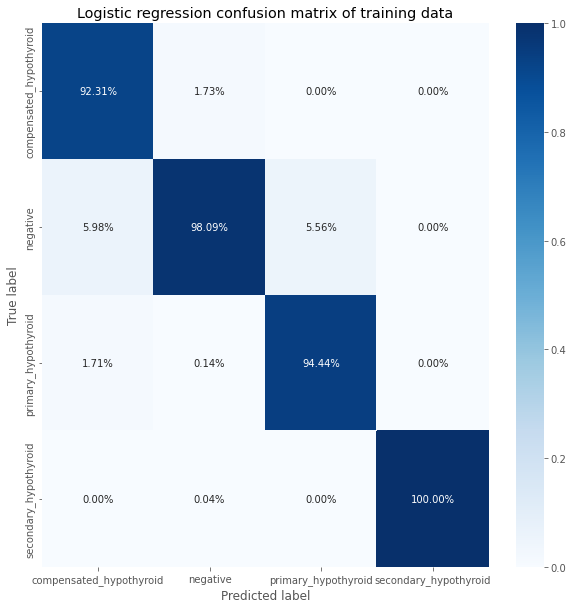

In [ ]:
# Plotting a confusion matrix of training data

conf = confusion_matrix(y_train, y_train_pred_bp)
sns.heatmap(conf/np.sum(conf,axis=0),
            annot=True,
            fmt='.2%',
            cmap='Blues',
            yticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']),
            xticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']));
plt.title('Logistic regression confusion matrix of training data');
plt.xlabel('Predicted label');
plt.ylabel('True label');

In [ ]:
# Raw confusion matrix

conf

array([[ 108,   49,    0,    0],
       [   7, 2773,    4,    0],
       [   2,    4,   68,    0],
       [   0,    1,    0,    1]])

In [ ]:
print(f"Micro  recall score is: {recall_score(y_train, y_train_pred_bp, average='micro')}")
print(f"Macro  recall score is: {recall_score(y_train, y_train_pred_bp, average='macro')}")


Micro  recall score is: 0.9777925091150149
Macro  recall score is: 0.7742139068290781


This matrix is a little bit different than the model without GridSearchCV.
Still 6 cases of `compensated_hypothyroid` have been classified as `negative`.
Now, 4 cases of `primary_hypothyroid` have been classified as `negative` and 1 of only 2 cases of `secondary_hypothyroid` has been classified as `negative`. This makes this model have 11 wrongly classified cases which we care about.

Let's see how it performs on the test data.

In [ ]:
# Predicting on the test data

y_test_pred_bp = logreg_best_params.predict(X_test_tr)

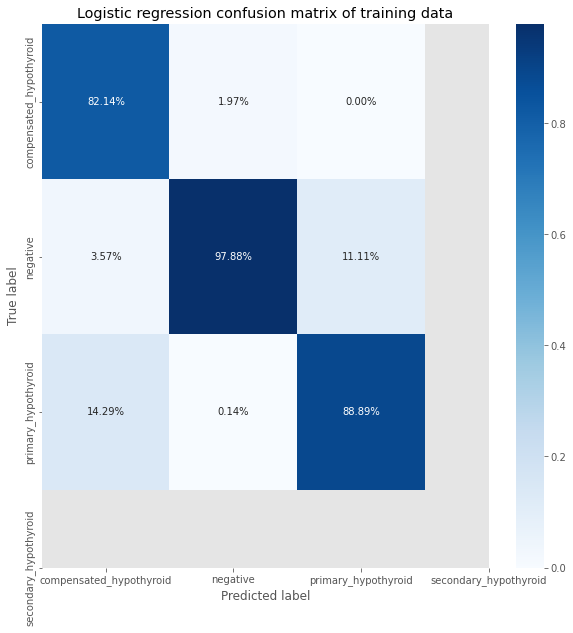

In [ ]:
#
conf = confusion_matrix(y_test, y_test_pred_bp)
sns.heatmap(conf/np.sum(conf,axis=0),
            annot=True,
            fmt='.2%',
            cmap='Blues',
            yticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']),
            xticklabels=(['compensated_hypothyroid','negative','primary_hypothyroid','secondary_hypothyroid']));
plt.title('Logistic regression confusion matrix of training data');
plt.xlabel('Predicted label');
plt.ylabel('True label');

In [ ]:
conf

array([[ 23,  14,   0],
       [  1, 694,   2],
       [  4,   1,  16]])

In [ ]:
print(f"Micro  recall score is: {recall_score(y_test, y_test_pred_bp, average='micro')}")
print(f"Macro  recall score is: {recall_score(y_test, y_test_pred_bp, average='macro')}")

Micro  recall score is: 0.9708609271523179
Macro  recall score is: 0.7930740742792391


In conclusion, we have performed a series of classification algorithms aiming to classify out patients in 4 different classes.

We can say that we partially succeeded.
Main metric to aim for and improve was the macro recall score which tells us most about our classes with low frequencies of cases.

This model could and should be improved upon, mostly in regards to data preprocessing. Every variable that could be used was used, but perhaps a better approach would be to try some dimensionality reduction technique and then apply the classification algorithm. This could also help us get less errors with convergence because we will lower the limit of our predictors and after standardization of them, it should be easier for the model to find the global minima of the cost function of the models.

What also is acceptable is ot perhaps try some over or under sampling, or a combination of both.

Finally, in this cases with where being in a specific class means having some health or being under any different kind of risk, it is best to see with the client and with some relevant expert on what the best case of classification would be.

In this work it is assumed that every non-healthy person being classified as healthy(`negative`) is what we want to avoid the most, but a healthy person being classified in any other three classes is a mistake we could deal with. It is much more beneficial to here and there classify some healthy person as ill than to miss any really ill persons and classify them as healthy.  